# <div style="text-align: center"> Taller 3 </div>  
<div style="text-align: center"> Alejandro Alayón Suárez - 201316083</div>
___

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
import numpy as np
import string
import matplotlib.cm as cm
import os
import scipy as sp
from scipy import ndimage

## <div style="text-align: justify"> 1. </div>  
___
En primer lugar se desarrolló una función la cual tiene como parámetros de entrada el nombre de una carpeta y el nombre de un archivo. Dicha función se encarga de convertir un archivo en formato _.VBO_ a un cuadro de datos el cual contiene las siguientes columnas:

* Altitud   [m]
* Latitud   [min]
* Longitud  [min]
* Tiempo    [s]
* Velocidad [m/s]  

El código de la función es expuesto a continuación:


In [2]:
def importdata(base_dir,data_file):
    
    with open(os.path.join(base_dir,data_file), 'r') as vboxdata:
        section = []
        time = []
        lat = []
        long = []
        vel = []
        height = []
        vertv = []
        for line in vboxdata:
            if line[0] == '[':
                section = str.replace(line, "\n","")
                continue
            if section == '[column names]':
                col_names = str.replace(line, "  \n","").split('  ')
                section = []
            if section == '[data]':
                linesplit = str.replace(line, " \n","").split(' ')
                time.append(float(linesplit[1][0:2])*3600+float(linesplit[1][2:4])*60+float(linesplit[1][4:]))
                lat.append(float(linesplit[2]))
                long.append(float(linesplit[3]))
                vel.append(float(linesplit[4]))
                height.append(float(linesplit[6]))
                vertv.append(float(linesplit[7]))
        
        
    time = np.asarray(time)
    lat = np.asarray(lat)
    long = np.asarray(long)
    vel = np.asarray(vel)*(1000/(60*60))
    height = np.asarray(height)
    vertv = np.asarray(vertv)
    time_base = time[0]
    time = time - time_base
    lat = lat/60.0
    long = -long/60.0
    dt = time[1]-time[0]
    
    reta={'Tiempo [s]':time,'Latitud [min]':lat,'Longitud [min]':long,'Velocidad [m/s]':vel,'Altitud [m]':height}
    ret=pd.DataFrame(data=reta)
    
    return ret

## <div style="text-align: justify"> 2. </div>  
___
Ahora bien, una vez la forma de importar los datos ha sido definida se puede proceder al análisis de los mismos, para esto se implementaron 3 funciones con el objetivo de extraer los datos sin procesar y llevarlos hasta instancias gráficas o de arreglos que sean comparables y coherentes entre si (tanto para el kart eléctrico como para el kart de combustión interna).   

La primera de ellas fue denominada _**Lap**_, esta mapea la posición del kart entre un tiempo inicial _$T_i$_ y un tiempo final _$T_f$_, retornando un mapa aproximado de la pista, la velocidad máxima del kart y el tiempo de vuelta en el intervalo elegido. La función recibe como parámetros un cuadro de datos, un tiempo inicial y un tiempo final, el código de la función es mostrado a continuación: 


In [4]:
def Lap(Data,Ti,Tf):
    data1=Data[(Data['Tiempo [s]']>=Ti)&(Data['Tiempo [s]']<=Tf)]
    plt.plot(data1['Longitud [min]'],data1['Latitud [min]'])
    plt.title('Mapeo de la vuelta')
    plt.axis('off')

    return print('El tiempo de vuelta es de',Tf-Ti,'[s]', 'y la velocidad máxima alcanzada es de', round(max(data1['Velocidad [m/s]']),2),'[m/s]') , plt.show();

La segunda función fue denominada _**velfilt**_, esta realiza un filtrado gaussiano de orden 0 y $\sigma=20$ a los datos de la velocidad en un intervalo de tiempo establecido, así retornando un arreglo de las velocidades filtradas. Los parámetros de entrada son un cuadro de datos, un tiempo inicial y un tiempo final. El código de la función es expuesto a continuación:

In [203]:
def velfilt(Data,Ti,Tf):
    data1=Data[(Data['Tiempo [s]']>=Ti)&(Data['Tiempo [s]']<=Tf)]
    vfilt=ndimage.gaussian_filter1d(data1['Velocidad [m/s]'], sigma=20, order=0, mode='wrap')
    return vfilt


Finalmente, se implementó la función denominada _**acelfilt**_ la cual, dados un cuadro de datos y un intervalo de tiempo, realiza una derivación filtrada de la velocidad, así obteniendo un arreglo con los datos de la aceleración instantanea filtrada para el kart. El filtro es el mismo utilizado en la función anterior pero de orden 1. El código de la función puede ser apreciado a continuación:

In [207]:
def acelfilt(Data, Ti, Tf):
    data1=Data[(Data['Tiempo [s]']>=Ti)&(Data['Tiempo [s]']<=Tf)]
    dt=data1.iloc[1]['Tiempo [s]']-data1.iloc[0]['Tiempo [s]']
    a=ndimage.gaussian_filter1d(data1['Velocidad [m/s]'], sigma=20, order=1, mode='wrap') / dt
    return a

Utilizando las funciones anteriormente explicadas se analizaron los 16 archivos .VBO con el objetivo de encontrar los mejores tiempos de vuelta y las velocidades máximas en cada una de ellas. Este procedimiento

In [14]:
VBS52=importdata('data_electrico','VBS__052.VBO')

El tiempo de vuelta es de 282 [s] y la velocidad máxima alcanzada es de 20.69 [m/s]


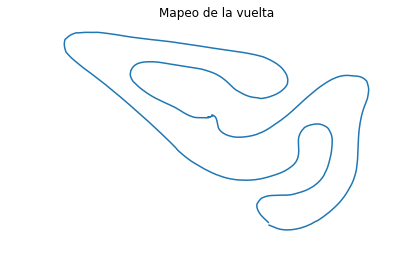

In [44]:
Lap(VBS52,513,795);

El tiempo de vuelta es de 136 [s] y la velocidad máxima alcanzada es de 19.31 [m/s]


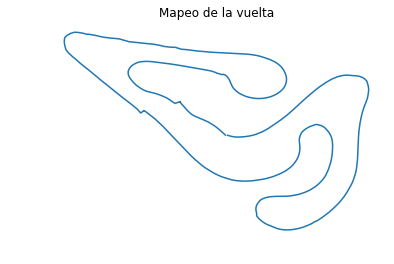

In [43]:
Lap(VBS52,776,912);

In [107]:
VBO20=importdata('Data','VBOX0020.VBO')

El tiempo de vuelta es de 54.5 [s] y la velocidad máxima alcanzada es de 25.49 [m/s]


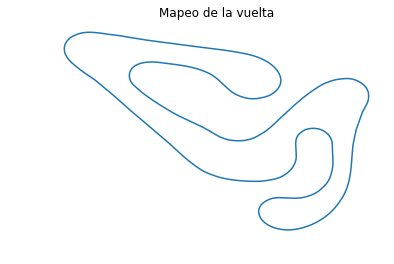

In [129]:
Lap(VBO20,75.5,130);

In [142]:
VBO25=importdata('Data','VBOXs0002.VBO')
max(VBO25['Velocidad [m/s]'])

28.75

In [202]:
asq=VBO20[(VBO20['Tiempo [s]']>=75.5)&(VBO20['Tiempo [s]']<=130)]
vfiltt=ndimage.gaussian_filter1d(asq['Velocidad [m/s]'], sigma=20, order=0, mode='wrap')
max(vfiltt)

24.679160914475148

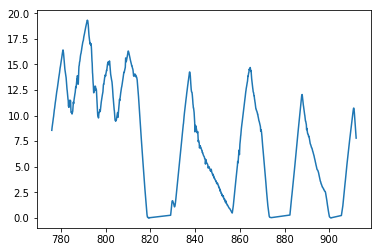

In [192]:
data2=VBS52[(VBS52['Tiempo [s]']>=776)&(VBS52['Tiempo [s]']<=912)]
plt.plot(data2['Tiempo [s]'],data2['Velocidad [m/s]'])
plt.show()

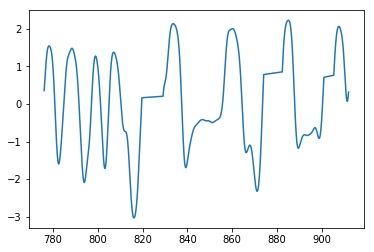

In [11]:
dt=data2.iloc[1]['Tiempo [s]']-data2.iloc[0]['Tiempo [s]']
a=accel(data2['Velocidad [m/s]'], dt)
plt.plot(data2['Tiempo [s]'],a)
plt.show()

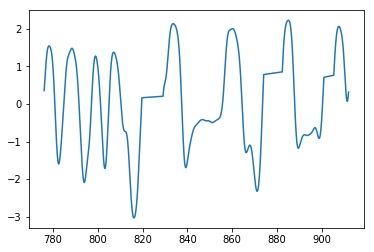

In [209]:

a=acelfilt(VBS52,776,912)
plt.plot(data2['Tiempo [s]'],a)
plt.show()